In [1]:
import numpy as np
import pandas as pd
from scapy.all import *
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument

In [2]:
pcap_file1='/home/rutwikk/NetworkML/one_sample_pcap/def.pcap'
pcap_file2='/home/rutwikk/NetworkML/one_sample_pcap/abc.pcap'
pcap_file3= '/home/rutwikk/NetworkML/one_sample_pcap/13332500500846625594_malware_adload.pcap'

In [3]:
def get_header(pcap_file):
    raw_file=pcap_file.encode('utf-8')
    hex_file=raw_file.hex()
    return hex_file

In [4]:
hex1 = get_header(pcap_file1)
hex1

'2f686f6d652f72757477696b6b2f4e6574776f726b4d4c2f6f6e655f73616d706c655f706361702f6465662e70636170'

In [5]:
def pcap_2_hex(pcap_file):
    scapy_cap = rdpcap(pcap_file)
    file_string=""
    file_string+= get_header(pcap_file)
    for packet in scapy_cap:
        raw_packet=raw(packet)
        hex_packet= str(s.hex())
        for x in range(len(hex_packet)):
                char_gram=hex_packet[x:x+10]
                file_string+=char_gram
                file_string+="    "
    return file_string

In [6]:
dataframe_pcap=pd.read_csv("pcap2vec.csv")

In [7]:
display(dataframe_pcap.head())

,File,Label
0,2f686f6d652f72757477696b6b2f4e6574776f726b4d4c...,malware_emotet
1,2f686f6d652f72757477696b6b2f4e6574776f726b4d4c...,malware_trickbot
2,2f686f6d652f72757477696b6b2f4e6574776f726b4d4c...,benign_benign
3,2f686f6d652f72757477696b6b2f4e6574776f726b4d4c...,malware_tinba
4,2f686f6d652f72757477696b6b2f4e6574776f726b4d4c...,malware_trickbot


In [8]:
dataframe_pcap['File'][2]

'2f686f6d652f72757477696b6b2f4e6574776f726b4d4c2f73616d706c65645f706361705f31306b2f393330303335353432353034373239393036355f62656e69676e5f62656e69676e2e706361705254001235    2540012350    5400123502    4001235020    0012350208    0123502080    1235020800    2350208002    3502080027    502080027a    02080027a3    2080027a38    080027a383    80027a3834    0027a38343    027a383430    27a3834308    7a38343080    a383430800    3834308004    8343080045    3430800450    4308004500    3080045000    0800450000    8004500004    004500004b    04500004b4    4500004b47    500004b472    00004b472a    0004b472a0    004b472a00    04b472a000    4b472a0000    b472a00008    472a000080    72a0000801    2a00008011    a000080110    0000801104    000801104c    00801104c3    0801104c30    801104c30a    01104c30a0    1104c30a00    104c30a000    04c30a0002    4c30a00020    c30a00020f    30a00020fc    0a00020fc0    a00020fc0a    00020fc0a8    0020fc0a82    020fc0a821    20fc0a821f    0fc0a821fe    fc0a821fef    c

In [9]:
dataframe_pcap['File'][1]

'2f686f6d652f72757477696b6b2f4e6574776f726b4d4c2f73616d706c65645f706361705f31306b2f383030333331333538333939313439313539375f6d616c776172655f747269636b626f742e7063617001005e7fff    1005e7ffff    005e7ffffa    05e7ffffa8    5e7ffffa80    e7ffffa801    7ffffa8019    ffffa80193    fffa801934    ffa8019341    fa80193417    a801934179    8019341797    0193417976    1934179760    9341797600    3417976008    4179760080    1797600800    7976008004    9760080045    7600800450    6008004500    0080045000    0800450000    800450000c    00450000c8    0450000c8b    450000c8b5    50000c8b53    0000c8b53f    000c8b53f4    00c8b53f40    0c8b53f400    c8b53f4000    8b53f40000    b53f400001    53f4000011    3f40000111    f400001111    4000011111    000011111b    00011111bd    0011111bdc    011111bdc0    11111bdc0a    1111bdc0a8    111bdc0a80    11bdc0a801    1bdc0a8018    bdc0a80186    dc0a80186e    c0a80186ef    0a80186eff    a80186efff    80186effff    0186efffff    186effffff    86effffffa    6effffffa

In [10]:
dataframe_pcap['File'].apply(lambda x: len(x.split(' '))).sum()

266713448

In [11]:
df= dataframe_pcap

In [12]:
from bs4 import BeautifulSoup
def cleanText(text):
    #text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    return text
df['File'] = df['File'].apply(cleanText)
display(df['File'][0])

'2f686f6d652f72757477696b6b2f4e6574776f726b4d4c2f73616d706c65645f706361705f31306b2f373731383837353837343531313238313637365f6d616c776172655f656d6f7465742e706361701c6f65c043    c6f65c0439    6f65c04392    f65c043920    65c0439208    5c04392080    c043920800    0439208002    4392080027    3920800271    9208002711    2080027114    080027114e    80027114ef    0027114efa    027114efa0    27114efa08    7114efa080    114efa0800    14efa08004    4efa080045    efa0800450    fa08004500    a080045000    0800450000    8004500003    0045000034    0450000341    450000341a    50000341a4    0000341a4c    000341a4c4    00341a4c40    0341a4c400    341a4c4000    41a4c40008    1a4c400080    a4c4000800    4c40008006    c400080064    400080064e    00080064e1    0080064e17    080064e17c    80064e17c0    0064e17c0a    064e17c0a8    64e17c0a80    4e17c0a801    e17c0a8017    17c0a80171    7c0a801713    c0a801713e    0a801713e4    a801713e4b    801713e4b9    01713e4b91    1713e4b91f    713e4b91fc    13e4b91fcc   

In [13]:
train, test = train_test_split(df, test_size=0.3, random_state=42)
import nltk


In [14]:
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if(len(word)>2):
                tokens.append(word.lower())
    return tokens
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['File']), tags=[r.Label]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['File']), tags=[r.Label]), axis=1)

In [15]:
train_tagged.values[1]

TaggedDocument(words=['2f686f6d652f72757477696b6b2f4e6574776f726b4d4c2f73616d706c65645f706361705f31306b2f343435323034303138383036353134323238375f62656e69676e5f62656e69676e2e706361705254001235', '2540012350', '5400123502', '4001235020', '0012350208', '0123502080', '1235020800', '2350208002', '3502080027', '502080027a', '02080027a3', '2080027a38', '080027a383', '80027a3834', '0027a38343', '027a383430', '27a3834308', '7a38343080', 'a383430800', '3834308004', '8343080045', '3430800450', '4308004500', '3080045000', '0800450000', '8004500003', '0045000034', '0450000344', '4500003443', '5000034437', '0000344377', '0003443774', '0034437740', '0344377400', '3443774000', '4437740008', '4377400080', '3774000800', '7740008006', '740008006d', '40008006df', '0008006df5', '008006df52', '08006df520', '8006df520a', '006df520a0', '06df520a00', '6df520a000', 'df520a0002', 'f520a00020', '520a00020f', '20a00020f6', '0a00020f68', 'a00020f685', '00020f6853', '0020f68536', '020f685363', '20f6853639', '0f68536

In [18]:
import multiprocessing
cores = multiprocessing.cpu_count()
cores

8

In [19]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7000/7000 [00:00<00:00, 2617933.84it/s]


In [20]:
for epoch in range(1):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=20)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7000/7000 [00:00<00:00, 3242779.77it/s]


In [21]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words)) for doc in sents])
    return targets, regressors

In [20]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


/home/rutwikk/anaconda3/envs/gensim/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [21]:
from sklearn import metrics
score = metrics.accuracy_score(y_test, y_pred)
print(score)

0.8706666666666667


In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=0)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
score = metrics.accuracy_score(y_pred, y_test)
print(score)

0.2643333333333333


In [23]:
from sklearn import svm
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)
svm_clf = svm.SVC(gamma='auto', max_iter=100)
svm_clf.fit(X_train, y_train)
predicted = svm_clf.predict(X_test)

/home/rutwikk/anaconda3/envs/gensim/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


In [24]:
print(
    f"Classification report for classifier {svm_clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)
metrics.accuracy_score(y_test,predicted)

Classification report for classifier SVC(gamma='auto', max_iter=100):
                          precision    recall  f1-score   support

           bengin_benign       0.84      0.65      0.73       242
           benign_benign       0.84      0.95      0.89       516
          benign_benign7       1.00      1.00      1.00         8
          malware_adload       0.94      0.96      0.95       117
         malware_artemis       1.00      1.00      1.00        71
    malware_bitcoinminer       0.50      0.24      0.33        33
        malware_ccleaner       0.67      0.61      0.64        59
          malware_cobalt       0.40      0.12      0.19        16
        malware_downware       0.27      0.12      0.17        25
          malware_dridex       0.97      0.93      0.95        75
          malware_emotet       0.99      1.00      1.00       364
           malware_htbot       0.97      0.96      0.97       239
      malware_magichound       0.91      0.92      0.91       215
     

0.867

In [25]:
import pickle
with open('adb_model.pkl','wb') as f:
    pickle.dump(ada_clf,f)

with open('logreg.pkl','wb') as f:
    pickle.dump(logreg,f)
    

In [26]:
with open('svm_model.pkl','wb') as f:
    pickle.dump(svm_clf,f)

In [27]:
with open('model_dbow.pkl','wb') as f:
    pickle.dump(model_dbow,f)

In [22]:
import pickle
model_dbow = pickle.load(open('model_dbow.pkl', 'rb'))

In [23]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)
# get importance
importance = dtree.feature_importances_

ValueError: could not convert string to float: 'benign_benign'

In [ ]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [24]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=1000)
y_tsne, x_tsne = vec_for_learning(model_dbow, train_tagged)
tsne_res = tsne.fit_transform(x_tsne[1:1000])

/home/rutwikk/anaconda3/envs/gensim/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/rutwikk/anaconda3/envs/gensim/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


done


TypeError: 'tuple' object does not support item assignment

In [32]:
labels = y_tsne[1:1000]

done


<AxesSubplot:xlabel='tsne_firstD', ylabel='tsne_secondD'>

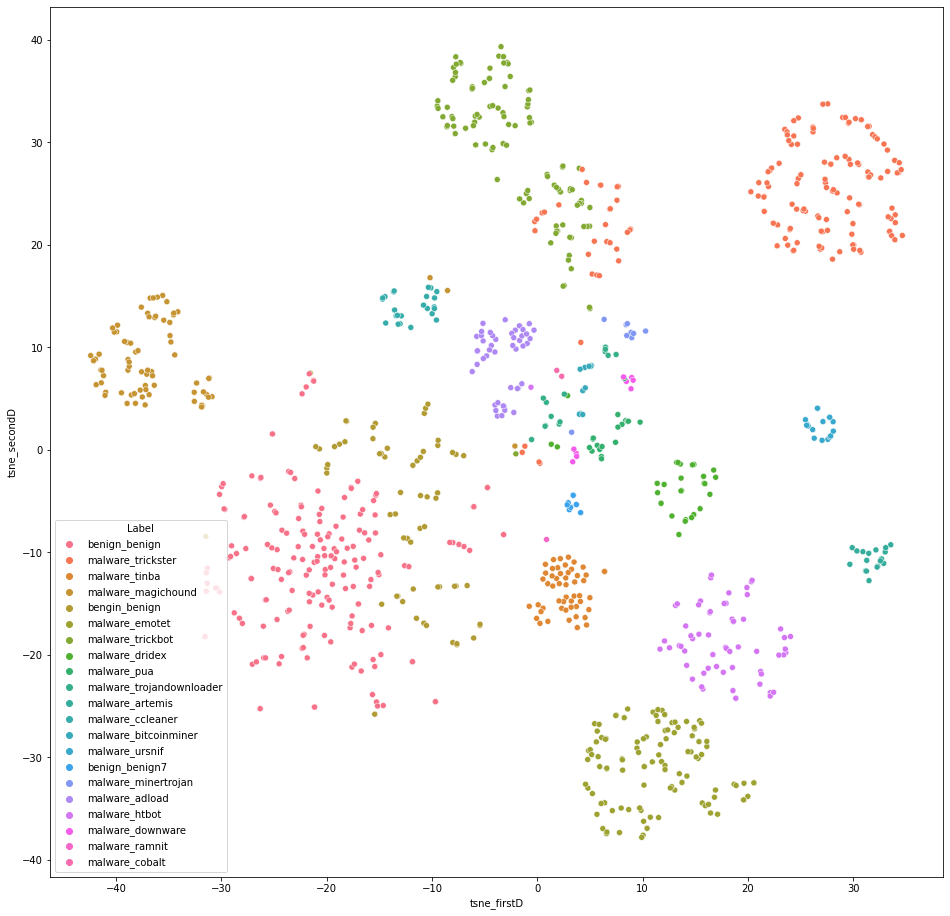

In [34]:
import seaborn as sns
print("done")
tsne_df = pd.DataFrame()
tsne_df['tsne_firstD'] = tsne_res[:,0]
tsne_df['tsne_secondD'] = tsne_res[:,1]
tsne_df['Label'] = labels
plt.figure(figsize=(16,16))
sns.scatterplot(
    x="tsne_firstD", y="tsne_secondD",
    data=tsne_df,
    hue="Label",
    legend="full"
)